In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use("ggplot")

In [25]:
# 乱数を使用した時に、毎回同じ結果を得るために指定
torch.manual_seed(123)

In [26]:
a = 5
b = 2
# 0〜10の間のデータを100個作成
x = torch.linspace(0, 10, 100)

In [27]:
x

tensor([ 0.0000,  0.1010,  0.2020,  0.3030,  0.4040,  0.5051,  0.6061,  0.7071,
         0.8081,  0.9091,  1.0101,  1.1111,  1.2121,  1.3131,  1.4141,  1.5152,
         1.6162,  1.7172,  1.8182,  1.9192,  2.0202,  2.1212,  2.2222,  2.3232,
         2.4242,  2.5253,  2.6263,  2.7273,  2.8283,  2.9293,  3.0303,  3.1313,
         3.2323,  3.3333,  3.4343,  3.5354,  3.6364,  3.7374,  3.8384,  3.9394,
         4.0404,  4.1414,  4.2424,  4.3434,  4.4444,  4.5455,  4.6465,  4.7475,
         4.8485,  4.9495,  5.0505,  5.1515,  5.2525,  5.3535,  5.4545,  5.5556,
         5.6566,  5.7576,  5.8586,  5.9596,  6.0606,  6.1616,  6.2626,  6.3636,
         6.4646,  6.5657,  6.6667,  6.7677,  6.8687,  6.9697,  7.0707,  7.1717,
         7.2727,  7.3737,  7.4747,  7.5758,  7.6768,  7.7778,  7.8788,  7.9798,
         8.0808,  8.1818,  8.2828,  8.3838,  8.4848,  8.5859,  8.6869,  8.7879,
         8.8889,  8.9899,  9.0909,  9.1919,  9.2929,  9.3939,  9.4950,  9.5960,
         9.6970,  9.7980,  9.8990, 10.00

In [28]:
# view：サイズ数を調整する。以下は元々1個の配列に100個データが入っていたが、100個の配列に1個のデータが入るように変形している。
# 第一引数はバッチの次元を指定する。
x = x.view(100, 1)

In [29]:
x

tensor([[ 0.0000],
        [ 0.1010],
        [ 0.2020],
        [ 0.3030],
        [ 0.4040],
        [ 0.5051],
        [ 0.6061],
        [ 0.7071],
        [ 0.8081],
        [ 0.9091],
        [ 1.0101],
        [ 1.1111],
        [ 1.2121],
        [ 1.3131],
        [ 1.4141],
        [ 1.5152],
        [ 1.6162],
        [ 1.7172],
        [ 1.8182],
        [ 1.9192],
        [ 2.0202],
        [ 2.1212],
        [ 2.2222],
        [ 2.3232],
        [ 2.4242],
        [ 2.5253],
        [ 2.6263],
        [ 2.7273],
        [ 2.8283],
        [ 2.9293],
        [ 3.0303],
        [ 3.1313],
        [ 3.2323],
        [ 3.3333],
        [ 3.4343],
        [ 3.5354],
        [ 3.6364],
        [ 3.7374],
        [ 3.8384],
        [ 3.9394],
        [ 4.0404],
        [ 4.1414],
        [ 4.2424],
        [ 4.3434],
        [ 4.4444],
        [ 4.5455],
        [ 4.6465],
        [ 4.7475],
        [ 4.8485],
        [ 4.9495],
        [ 5.0505],
        [ 5.1515],
        [ 5.

In [30]:
eps = torch.randn(100, 1)
y = a * x + b + eps

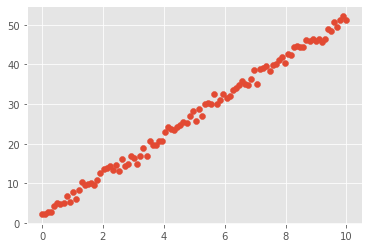

In [31]:
# 散布図を描画する。第1引数にx軸、第2引数にy軸を指定する。
plt.scatter(x, y)

In [32]:
class LR(nn.Module):
    def __init__(self):
        super().__init__()
        # in_features：入力値の数、out_features：出力値の数
        self.linear = nn.Linear(in_features=1, out_features=1)
    # 順伝播、forwardを定義しておくと、学習中に自動的に呼ばれる
    def forward(self, x):
        output = self.linear(x)
        return output

In [33]:
model = LR()

In [34]:
x_test = torch.tensor([[1.0], [2.0]])

In [35]:
x_test

tensor([[1.],
        [2.]])

In [36]:
model(x_test)

tensor([[-0.6505],
        [-1.4166]], grad_fn=<AddmmBackward>)

In [37]:
x2 = torch.linspace(0, 3, 100).view(100, 1)

In [38]:
x2

tensor([[0.0000],
        [0.0303],
        [0.0606],
        [0.0909],
        [0.1212],
        [0.1515],
        [0.1818],
        [0.2121],
        [0.2424],
        [0.2727],
        [0.3030],
        [0.3333],
        [0.3636],
        [0.3939],
        [0.4242],
        [0.4545],
        [0.4848],
        [0.5152],
        [0.5455],
        [0.5758],
        [0.6061],
        [0.6364],
        [0.6667],
        [0.6970],
        [0.7273],
        [0.7576],
        [0.7879],
        [0.8182],
        [0.8485],
        [0.8788],
        [0.9091],
        [0.9394],
        [0.9697],
        [1.0000],
        [1.0303],
        [1.0606],
        [1.0909],
        [1.1212],
        [1.1515],
        [1.1818],
        [1.2121],
        [1.2424],
        [1.2727],
        [1.3030],
        [1.3333],
        [1.3636],
        [1.3939],
        [1.4242],
        [1.4545],
        [1.4848],
        [1.5152],
        [1.5455],
        [1.5758],
        [1.6061],
        [1.6364],
        [1

In [39]:
x2.size()

torch.Size([100, 1])

In [40]:
y_pred = model(x2)

In [41]:
y_pred

tensor([[ 1.1556e-01],
        [ 9.2342e-02],
        [ 6.9127e-02],
        [ 4.5912e-02],
        [ 2.2697e-02],
        [-5.1795e-04],
        [-2.3733e-02],
        [-4.6948e-02],
        [-7.0163e-02],
        [-9.3378e-02],
        [-1.1659e-01],
        [-1.3981e-01],
        [-1.6302e-01],
        [-1.8624e-01],
        [-2.0945e-01],
        [-2.3267e-01],
        [-2.5588e-01],
        [-2.7910e-01],
        [-3.0231e-01],
        [-3.2553e-01],
        [-3.4874e-01],
        [-3.7196e-01],
        [-3.9517e-01],
        [-4.1839e-01],
        [-4.4160e-01],
        [-4.6482e-01],
        [-4.8803e-01],
        [-5.1125e-01],
        [-5.3446e-01],
        [-5.5768e-01],
        [-5.8089e-01],
        [-6.0411e-01],
        [-6.2732e-01],
        [-6.5054e-01],
        [-6.7375e-01],
        [-6.9697e-01],
        [-7.2018e-01],
        [-7.4340e-01],
        [-7.6661e-01],
        [-7.8983e-01],
        [-8.1304e-01],
        [-8.3626e-01],
        [-8.5947e-01],
        [-8

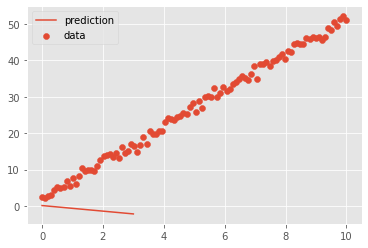

In [42]:
# 順伝播をしているので、勾配計算処理を外す => detach()
# plot：一本の線を描画
plt.plot(x2, y_pred.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()

In [43]:
# 損失関数
criterion = nn.MSELoss()
# 最適化関数
# 第1引数：model.parameters() => 重みとバイアスの情報が入っている。これを更新したい。
# 第2引数：学習率
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [44]:
losses = []
num_epoch = 500
for epoch in range(num_epoch):
    # ミニバッチのloopがないため、バッチ学習
    
    # 勾配の初期化を行う
    optimizer.zero_grad()
    # 予測値の計算
    y_pred = model(x)
    # 損失の計算：予想値と正解値を与える
    loss = criterion(y_pred, y)
    # 損失を誤差逆伝播する
    loss.backward()
    # 重みとバイアスの更新
    optimizer.step()
    if epoch % 10 == 0:
        print("epoch: {}, loss: {}".format(epoch, loss.item()))
        losses.append(loss.item())

epoch: 0, loss: 1221.19384765625
epoch: 10, loss: 296.3516540527344
epoch: 20, loss: 72.65264129638672
epoch: 30, loss: 18.543027877807617
epoch: 40, loss: 5.452998161315918
epoch: 50, loss: 2.284636974334717
epoch: 60, loss: 1.516102910041809
epoch: 70, loss: 1.328049898147583
epoch: 80, loss: 1.280423879623413
epoch: 90, loss: 1.2667850255966187
epoch: 100, loss: 1.2613884210586548
epoch: 110, loss: 1.2580046653747559
epoch: 120, loss: 1.255129337310791
epoch: 130, loss: 1.2523959875106812
epoch: 140, loss: 1.249718189239502
epoch: 150, loss: 1.2470738887786865
epoch: 160, loss: 1.2444573640823364
epoch: 170, loss: 1.2418670654296875
epoch: 180, loss: 1.2393015623092651
epoch: 190, loss: 1.2367624044418335
epoch: 200, loss: 1.2342474460601807
epoch: 210, loss: 1.2317582368850708
epoch: 220, loss: 1.2292927503585815
epoch: 230, loss: 1.2268524169921875
epoch: 240, loss: 1.224436640739441
epoch: 250, loss: 1.222043514251709
epoch: 260, loss: 1.219675064086914
epoch: 270, loss: 1.217328

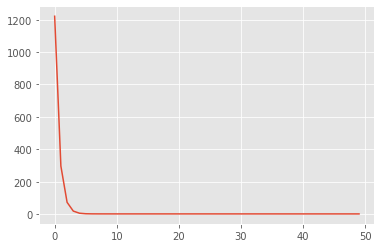

In [45]:
plt.plot(losses)

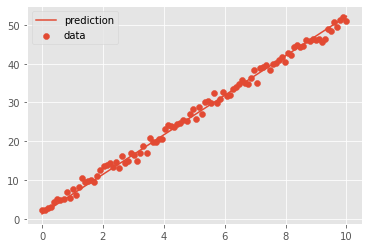

In [46]:
x_test = torch.linspace(0, 10, 100).view(100, 1)
y_test = model(x_test)
plt.plot(x_test, y_test.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()